# Problem 1

In [13]:
using LinearAlgebra, Plots

In [14]:
b = [4.5, 6]
norm_b = norm(b)
f(x) = norm(x - b)
∇f(x) = (x - b) ./ f(x) 
x = [0, 0];

In [15]:
# 2)
x = x - ∇f(x);

After 7 steps with constant step size 1, x reaches $\binom{4.2}{5.6}$. 
Since $\nabla f(x) = \frac{x - b}{\| x - b \|}$, $x^k - \nabla f(x^k)$ always takes steps of size 1 directly towards b. 
$\| x^7 - b \| = 0.5 < 1$, so the sequence cannot converge.

In [16]:
# 3)
k = 0
x = x - ∇f(x) .* (5/6)^k;

$\| x^0 - b \| = 7.5 > 6 = \frac{1}{1 - 5/6} = \sum_{k = 0}^{\infty} (\frac{5}{6})^k$. 
Therefore, it is impossible for the sequence to converge, the steps reduce in size too quickly. 

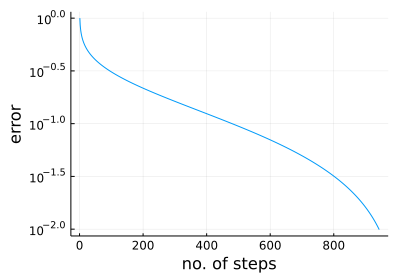

In [26]:
# 4)
error = [1.0]
x, k = [0, 0], 0
while error[end] > 0.01
    x = x - ∇f(x) ./ (k+1)
    error_2 = push!(error, f(x) / norm_b)
    k += 1
end

fig = plot(error, leg=false, size=(400,280),
           yaxis=("error", :log10), xaxis="no. of steps")

In [18]:
g(x) = sum( (x - b).^2 )
∇g(x) = 2 .* (x - b);

In [19]:
# 5)
error_5 = [1.0]
x, k = [0, 0], 0
while error_5[end] > 0.01
    x = x - ∇g(x) .* 0.1
    error = push!(error_5, g(x) / norm_b)
    k += 1
end

In [20]:
x, k, z = [0, 0], 0, 1.0
while z > eps() && g(x) / norm_b > 0.01
    z = z * (1/6)
    x = x - ∇g(x) .* z
    k += 1
end

After 20 steps, the step length has reached the machine epsilon. Unfortunately, $x^k - (\frac{1}{6})^k \nabla g(x)$ does not reach 1% of the optimal solution in 20 steps. Therefore, the sequence will not converge. 

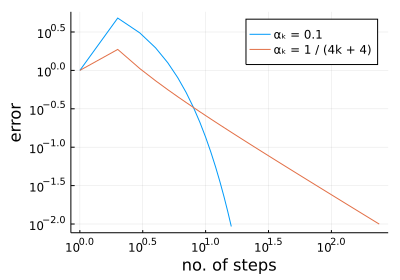

In [27]:
# 7)
error_7 = [1.0]
x, k, z = [0, 0], 0, 1.0
while error_7[end] > 0.01 && z > eps()
    z = 1/(4*k + 4)
    x = x - ∇g(x) .* z
    error = push!(error_7, g(x) / norm_b)
    k += 1
end

fig = plot(error_5, lab="αₖ = 0.1", size=(400,280),
           yaxis=("error", :log10), xaxis=("no. of steps", :log10))
fig = plot!(error_7, lab="αₖ = 1 / (4k + 4)")